In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better aesthetics
sns.set(style="whitegrid")


In [3]:

N = 100000  # Number of samples to generate


# Used this video for helping understand inverse transform sampling  - https://www.youtube.com/watch?v=9ixzzPQWuAY

# Cell 3: Implement Inverse Transform Sampling
def generate_Z(N):
    """
    Generate N random variables Z with the given cdf F(x) using inverse transform sampling.
    
    Parameters:
    N (int): Number of random variables to generate.
    
    Returns:
    np.ndarray: Array of generated random variables.
    """
    # Generate N uniform random variables in (0,1)
    U = np.random.uniform(0, 1, N)
    
    # Apply the inverse cdf: Z = sqrt(-ln(U))
    Z = np.sqrt(-np.log(U))
    
    return Z

# Generate the samples
Z_samples = generate_Z(N)

print(Z_samples[:5]) # print the first 5 samples


[1.06355377 0.22165781 0.35400076 0.75200781 1.66465921]


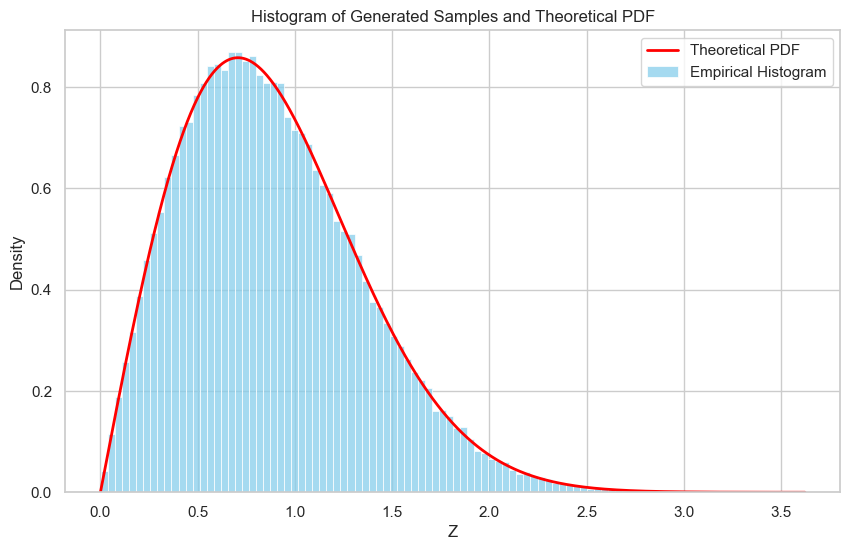

In [4]:
# Question 1.2

# Define the range for x
x_values = np.linspace(0, np.max(Z_samples), 1000)

# Define the theoretical probability density function (pdf)
def theoretical_pdf(x):
    """
    Compute the theoretical probability density function (pdf) for the given cdf.
    
    Parameters:
    x (float or np.ndarray): Value(s) at which to compute the pdf.
    
    Returns:
    float or np.ndarray: Theoretical pdf value(s).
    """
    return 2 * x * np.exp(-x**2) # this is the derivative - 2x * e^(-x^2)

# Compute the theoretical pdf
pdf_values = theoretical_pdf(x_values)

# Plot the histogram of the samples
plt.figure(figsize=(10, 6))
sns.histplot(Z_samples, bins=100, stat='density', color='skyblue', label='Empirical Histogram', kde=False)

# Plot the theoretical pdf
plt.plot(x_values, pdf_values, color='red', lw=2, label='Theoretical PDF')

# Add labels and title
plt.xlabel('Z')
plt.ylabel('Density')
plt.title('Histogram of Generated Samples and Theoretical PDF')
plt.legend()
plt.show()


In [5]:
# Defining the Event A_{x,k} and Its Distribution

def define_event(Z_samples, x):
    """
    Define the event A_{x,k} = {Z_k <= x} and compute the indicator random variable.
    
    Parameters:
    Z_samples (np.ndarray): Array of generated random variables.
    x (float): The threshold value.
    
    Returns:
    np.ndarray: Array of indicator variables (1 if Z_k <= x, else 0).
    """
    return (Z_samples <= x).astype(int) # if less than x, return 1, else 0

# Example usage for a specific x
x_example = 1.0
A_xk = define_event(Z_samples, x_example)

# Display the first 10 indicators
print(f"First 10 indicators for A_{{x,k}} with x = {x_example}:\n", A_xk[:10])


First 10 indicators for A_{x,k} with x = 1.0:
 [0 1 1 1 0 1 1 1 0 0]


In [6]:
# This should converge to the Empirical mean of the indicator variable

def empirical_probability(indicators):
    """
    Compute the empirical probability by averaging the indicator variables.
    
    Parameters:
    indicators (np.ndarray): Array of indicator variables (0 or 1).
    
    Returns:
    float: Empirical probability.
    """
    return np.mean(indicators)

# Compute empirical probability for the example x
emp_prob = empirical_probability(A_xk)
print(f"Empirical P(Z <= {x_example}) = {emp_prob}")

# Compute theoretical probability
F_x = 1 - np.exp(-x_example**2)
print(f"Theoretical F({x_example}) = {F_x}")


Empirical P(Z <= 1.0) = 0.63348
Theoretical F(1.0) = 0.6321205588285577


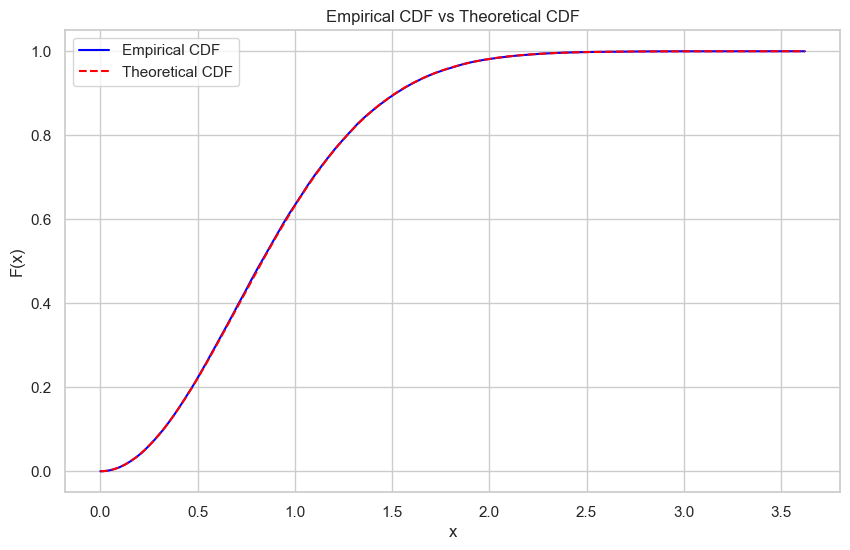

In [7]:
#  Empirical CDF vs Theoretical CDF -- Done a different way

def empirical_cdf(Z_samples, x):
    """
    Compute the empirical cumulative distribution function at point x.
    
    Parameters:
    Z_samples (np.ndarray): Array of generated random variables.
    x (float): The point at which to evaluate the empirical cdf.
    
    Returns:
    float: Empirical cdf value at x.
    """
    return np.mean(Z_samples <= x)

# Generate a range of x values for plotting
x_plot = np.linspace(0, np.max(Z_samples), 1000)

# Compute empirical cdf for each x
empirical_cdf_values = np.array([empirical_cdf(Z_samples, xi) for xi in x_plot])

# Compute theoretical cdf
theoretical_cdf_values = 1 - np.exp(-x_plot**2)

# Plot the empirical cdf and theoretical cdf
plt.figure(figsize=(10, 6))
plt.plot(x_plot, empirical_cdf_values, label='Empirical CDF', color='blue')
plt.plot(x_plot, theoretical_cdf_values, label='Theoretical CDF', color='red', linestyle='--')

# Add labels and title
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Empirical CDF vs Theoretical CDF')
plt.legend()
plt.show()


Approximation of I with n = 100000: 1.50074


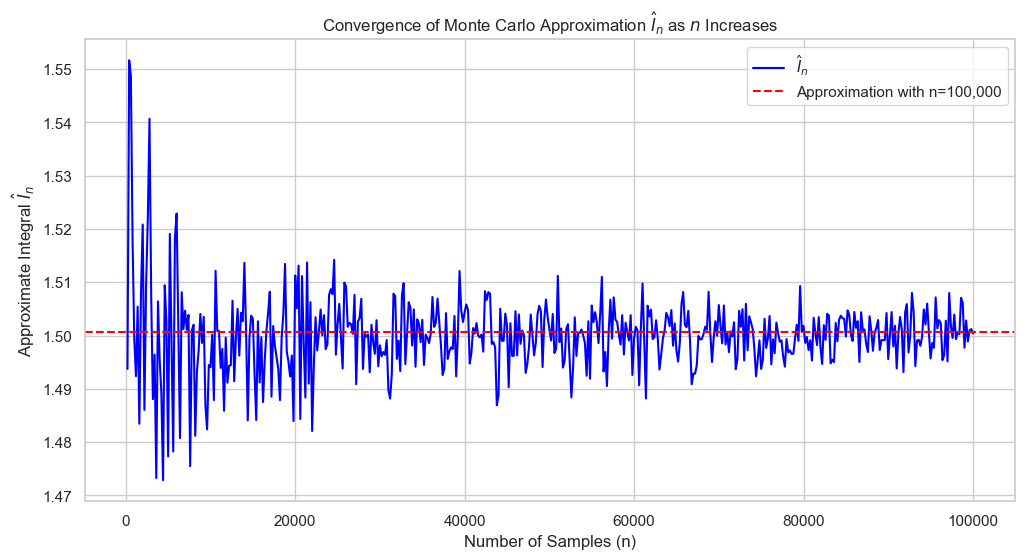

Required number of samples n to ensure P(|I - I_n| > 0.1) < 0.05: 17999
True value of the integral I: 1.50000
Empirical P(|I - I_n| > 0.1) = 0.0000
Expected probability threshold: 0.05
Empirical probability is less than the expected threshold.


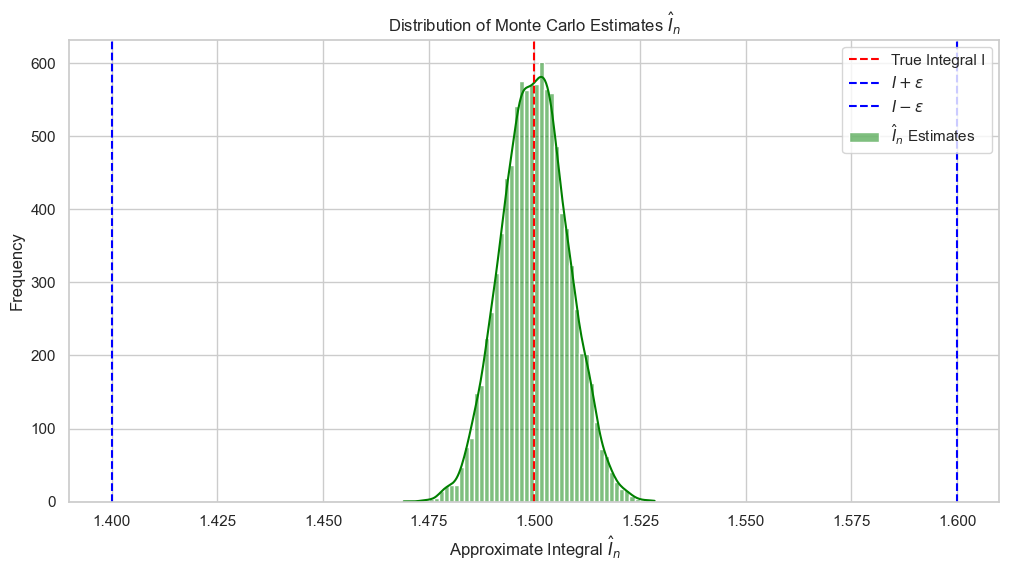

In [9]:
# Section 1: Monte Carlo Approximation of the Integral

# 1.a. Approximate I using Monte Carlo Integration
def monte_carlo_integration(n, a=0, b=3):
    """
    Approximate the integral I = ∫_a^b sin^2(2πx) dx using Monte Carlo Integration.
    
    Parameters:
    n (int): Number of random samples.
    a (float): Lower limit of integration.
    b (float): Upper limit of integration.
    
    Returns:
    float: Approximation of the integral I.
    """
    # Generate n uniform random variables in [a, b]
    U = np.random.uniform(a, b, n)
    
    # Compute Y_k = sin^2(2πU_k)
    Y = np.sin(2 * np.pi * U)**2
    
    # The integral is approximated by (b - a) * (1/n) * sum(Y_k)
    I_n = (b - a) * np.mean(Y)
    
    return I_n

# Approximating I with a large n
n_large = 100000
I_n_large = monte_carlo_integration(n_large)
print(f"Approximation of I with n = {n_large}: {I_n_large:.5f}")

# 1.b. Plotting I_n as a function of n to show convergence
def plot_convergence(max_n=100000, step=200, a=0, b=3):
    """
    Plot the Monte Carlo approximation of the integral I as a function of n.
    
    Parameters:
    max_n (int): Maximum number of samples.
    step (int): Step size for n - to save on computation time.
    a (float): Lower limit of integration.
    b (float): Upper limit of integration.
    """
    # Initialize lists to store n and corresponding I_n
    n_values = []
    I_n_values = []
    
    # Loop over n from step to max_n in increments of step
    for n in range(step, max_n + step, step):
        I_n = monte_carlo_integration(n, a, b)
        n_values.append(n)
        I_n_values.append(I_n)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(n_values, I_n_values, label=r'$\hat{I}_n$', color='blue')
    plt.axhline(y=I_n_large, color='red', linestyle='--', label='Approximation with n=100,000')
    plt.xlabel('Number of Samples (n)')
    plt.ylabel(r'Approximate Integral $\hat{I}_n$')
    plt.title(r'Convergence of Monte Carlo Approximation $\hat{I}_n$ as $n$ Increases')
    plt.legend()
    plt.show()

# Plot the convergence
plot_convergence()

# Section 2: Variance Bound

# 2. Showing that Var(Y_n) <= 1

"""
Show that Var(Y_n) <= 1 given Y_n = sin^2(2πU_n) and U_n ~ Uniform[0,3].

Since |Y_n| <= 1, we have Y_n^2 <= 1. since sin is bounded between -1 and 1, sin^2 will be bounded between 0 and 1.
Therefore, E(Y_n^2) <= 1.
Also, (E(Y_n))^2 <= E(Y_n^2) <= 1.
Hence, Var(Y_n) = E(Y_n^2) - (E(Y_n))^2 <= 1 - 0 = 1.

"Since Y_n = sin^2(2πU_n), and sin^2(theta) <= 1 for all theta,"
"we have |Y_n| <= 1. Therefore, Y_n^2 <= 1."
"Taking expectations, E(Y_n^2) <= 1."

#Summrizing the proof
"Also, (E(Y_n))^2 <= E(Y_n^2) <= 1." BTW - (E(Y_n))^2 <= E(Y_n^2) is just Jensen's inequality - https://en.wikipedia.org/wiki/Jensen%27s_inequality
"Hence, Var(Y_n) = E(Y_n^2) - (E(Y_n))^2 <= 1."""


# Section 3: Applying the Central Limit Theorem (CLT)

# 3. Determining n such that P(|I - I_n| > 0.1) < 0.05
def determine_n(epsilon=0.1, delta=0.05, var_Y=1, a=0, b=3):
    """
    Determine the number of samples n required to ensure that
    P(|I - I_n| > epsilon) < delta using the Central Limit Theorem.
    
    Parameters:
    epsilon (float): The error tolerance.
    delta (float): The probability threshold.
    var_Y (float): The upper bound on Var(Y_n).
    a (float): Lower limit of integration.
    b (float): Upper limit of integration.
    
    Returns:
    int: Required number of samples n.
    """
    # Using Chebyshev's inequality: P(|I - I_n| >= epsilon) <= Var(I_n) / epsilon^2
    # Var(I_n) = Var(Y_n) * (b - a)^2 / n <= (b - a)^2 / n
    # We want (b - a)^2 / n <= delta * epsilon^2
    n = int((b - a)**2 / (delta * epsilon**2))
    return n

epsilon = 0.1
delta = 0.05
n_required = determine_n()
print(f"Required number of samples n to ensure P(|I - I_n| > {epsilon}) < {delta}: {n_required}")

# Section 4: Empirical Validation - no need for wolfram alpha

# 4.a. Calculating the true value of I
def true_integral(a=0, b=3):
    """
    Calculate the true value of the integral I = ∫_a^b sin^2(2πx) dx analytically.
    
    Using the identity sin^2(theta) = (1 - cos(2theta)) / 2,
    the integral becomes:
    I = ∫_a^b [1 - cos(4πx)] / 2 dx = (b - a)/2 - [sin(4πx)/(8π)] evaluated from a to b.
    
    Parameters:
    a (float): Lower limit of integration.
    b (float): Upper limit of integration.
    
    Returns:
    float: True value of the integral I.
    """
    term1 = (b - a) / 2
    term2 = (np.sin(4 * np.pi * b) - np.sin(4 * np.pi * a)) / (8 * np.pi)
    I_true = term1 - term2
    return I_true

# Calculate the true integral
I_true = true_integral()
print(f"True value of the integral I: {I_true:.5f}")

# 4.b. Empirical estimation of P(|I - I_n| > 0.1)
def empirical_probability_estimation(I_true, n, epsilon=0.1, simulations=10000, a=0, b=3):
    """
    Empirically estimate the probability P(|I - I_n| > epsilon) by performing multiple simulations.
    
    Parameters:
    I_true (float): The true value of the integral.
    n (int): Number of samples per simulation.
    epsilon (float): The error tolerance.
    simulations (int): Number of simulations to perform.
    a (float): Lower limit of integration.
    b (float): Upper limit of integration.
    
    Returns:
    float: Empirical probability.
    """
    # Generate 'simulations' number of I_n estimates
    I_n_estimates = monte_carlo_integration(n, a, b)  # Placeholder
    
    # To perform multiple simulations efficiently, vectorize the process
    U = np.random.uniform(a, b, (simulations, n))
    Y = np.sin(2 * np.pi * U)**2
    I_n_estimates = (b - a) * np.mean(Y, axis=1)
    
    # Calculate the absolute deviations
    deviations = np.abs(I_true - I_n_estimates)
    
    # Calculate the proportion of deviations greater than epsilon
    prob = np.mean(deviations > epsilon)
    
    return prob



# Perform the empirical probability estimation
simulations = 10000
empirical_prob = empirical_probability_estimation(I_true, n_required, epsilon, simulations)
print(f"Empirical P(|I - I_n| > {epsilon}) = {empirical_prob:.4f}")
print(f"Expected probability threshold: {delta}")

# Compare with the expected delta
if empirical_prob < delta:
    print("Empirical probability is less than the expected threshold.")
elif empirical_prob == delta:
    print("Empirical probability is equal to the expected threshold.")
else:
    print("Empirical probability is greater than the expected threshold.")


# this is actually because assuming that varince is less than 1 is actually quite conservative, so the actual probability is less than the expected threshold

# Optional: Plotting the distribution of I_n estimates
def plot_I_n_distribution(I_true, n, simulations=10000, a=0, b=3):
    """
    Plot the distribution of I_n estimates and indicate the threshold epsilon.
    
    Parameters:
    I_true (float): The true value of the integral.
    n (int): Number of samples per simulation.
    simulations (int): Number of simulations to perform.
    a (float): Lower limit of integration.
    b (float): Upper limit of integration.
    """
    # Generate I_n estimates
    U = np.random.uniform(a, b, (simulations, n))
    Y = np.sin(2 * np.pi * U)**2
    I_n_estimates = (b - a) * np.mean(Y, axis=1)
    
    # Plotting the histogram
    plt.figure(figsize=(12, 6))
    sns.histplot(I_n_estimates, bins=50, kde=True, color='green', label=r'$\hat{I}_n$ Estimates')
    
    # Plot the true value
    plt.axvline(x=I_true, color='red', linestyle='--', label='True Integral I')
    
    # Plot the epsilon thresholds
    plt.axvline(x=I_true + epsilon, color='blue', linestyle='--', label=r'$I + \epsilon$')
    plt.axvline(x=I_true - epsilon, color='blue', linestyle='--', label=r'$I - \epsilon$')
    
    plt.xlabel(r'Approximate Integral $\hat{I}_n$')
    plt.ylabel('Frequency')
    plt.title(r'Distribution of Monte Carlo Estimates $\hat{I}_n$')
    plt.legend()
    plt.show()

# Plot the distribution of I_n estimates
plot_I_n_distribution(I_true, n_required, simulations)

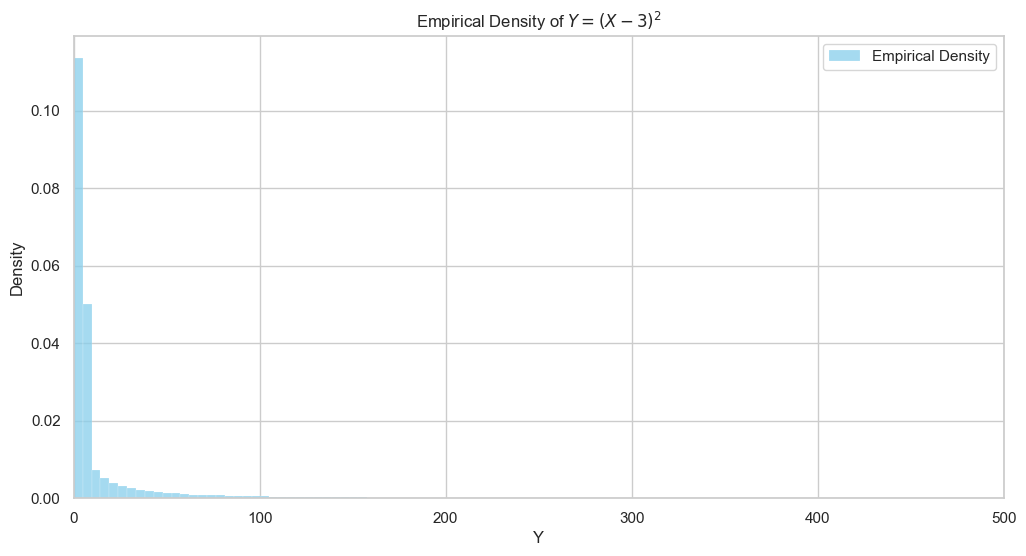

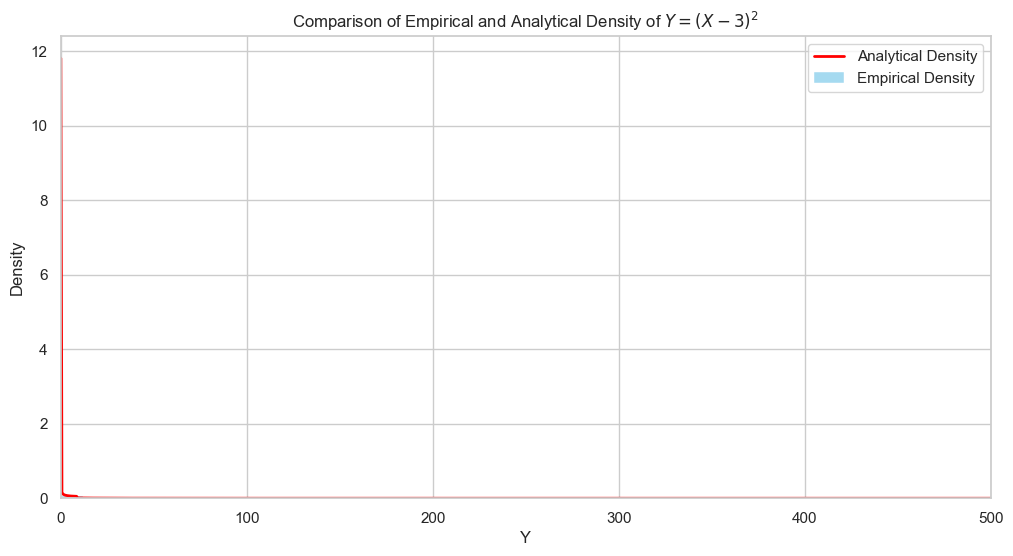

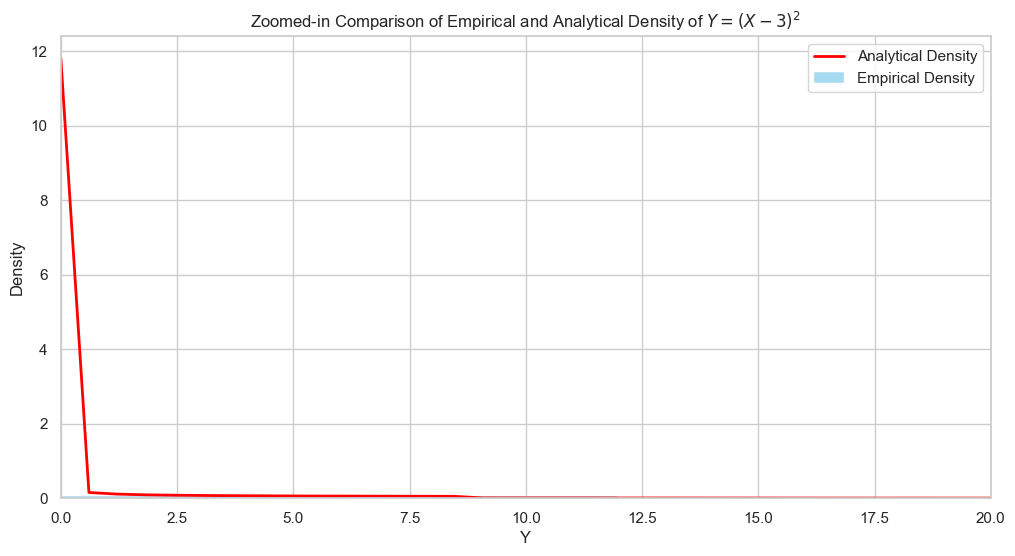

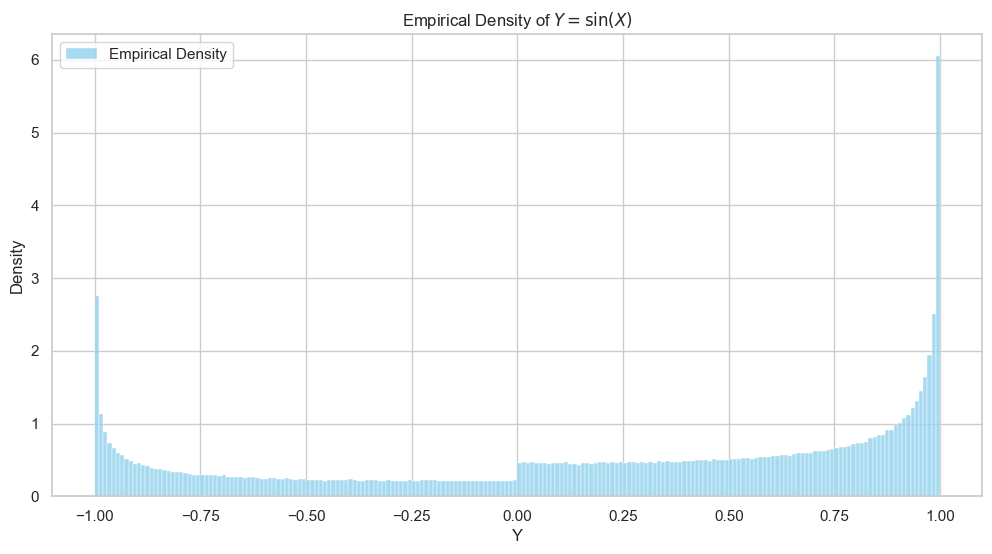

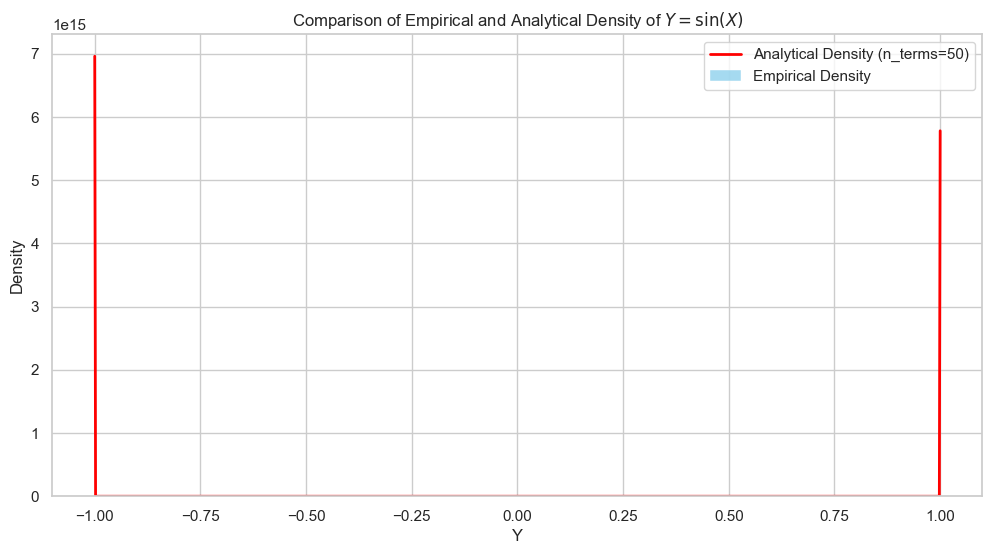

In [13]:
# Question 1: Generating an Exponential Random Variable [5 pts]

# Define the number of samples
N = 1000000  # Using a large number for smooth histograms

# Generate samples of X from Exponential(1/4)
X_samples = np.random.exponential(scale=4, size=N)

# Question 2.a: Empirical Estimation Using Histograms [5 pts]

# Compute Y = (X - 3)^2
Y_samples = (X_samples - 3)**2

# Plot the histogram of Y_samples
plt.figure(figsize=(12, 6))
sns.histplot(Y_samples, bins=500, stat='density', color='skyblue', label='Empirical Density', kde=False)

# Set labels and title
plt.xlabel('Y')
plt.ylabel('Density')
plt.title('Empirical Density of $Y = (X - 3)^2$')
# Set x-axis from 0 to 500
plt.xlim(0, 500)
plt.legend()
plt.show()

# Question 2.b: Analytical Derivation of the Density and Comparison [5 pts]

# Define the analytical PDF of Y
def f_Y(y):
    y = np.array(y)
    # Initialize density array
    density = np.zeros_like(y)
    
    # Avoid division by zero by ensuring y > 0
    epsilon = 1e-10
    y = np.maximum(y, epsilon)
    
    # For y >= 0 and y <= 9
    idx1 = (y >= 0) & (y <= 9)
    sqrt_y = np.sqrt(y[idx1])
    density[idx1] = (np.exp(-3/4) / (4 * sqrt_y)) * np.cosh(sqrt_y / 4)
    
    # For y > 9
    idx2 = y > 9
    sqrt_y = np.sqrt(y[idx2])
    density[idx2] = (1 / (8 * sqrt_y)) * np.exp(-(3 + sqrt_y) / 4)
    
    return density

# Define the range of y for plotting
# Using the 99.9th percentile to capture most of the distribution
y_max = np.percentile(Y_samples, 99.9)
y_values = np.linspace(0.0001, y_max, 1000)

# Compute the analytical density
pdf_values = f_Y(y_values)

# Plot the histogram and the analytical density
plt.figure(figsize=(12, 6))
sns.histplot(Y_samples, bins=200, stat='density', color='skyblue', label='Empirical Density', kde=False)
plt.plot(y_values, pdf_values, color='red', lw=2, label='Analytical Density')
plt.xlim(0, 500)

# Set labels and title
plt.xlabel('Y')
plt.ylabel('Density')
plt.title('Comparison of Empirical and Analytical Density of $Y = (X - 3)^2$')
plt.legend()
plt.show()

# Zoomed-in Plot for Better Visualization
plt.figure(figsize=(12, 6))
sns.histplot(Y_samples, bins=200, stat='density', color='skyblue', label='Empirical Density', kde=False)
plt.plot(y_values, pdf_values, color='red', lw=2, label='Analytical Density')

# Set x-limits to zoom in
plt.xlim(0, 20)

# Set labels and title
plt.xlabel('Y')
plt.ylabel('Density')
plt.title('Zoomed-in Comparison of Empirical and Analytical Density of $Y = (X - 3)^2$')
plt.legend()
plt.show()

# Extra credit attemp bc why not lol

# Generate samples of X from Exponential(1/4)

# Compute Y = sin(X)
Y_samples = np.sin(X_samples)

# Plot the histogram of Y_samples
plt.figure(figsize=(12, 6))
sns.histplot(Y_samples, bins=200, stat='density', color='skyblue', label='Empirical Density', kde=False)

# Set labels and title
plt.xlabel('Y')
plt.ylabel('Density')
plt.title('Empirical Density of $Y = \sin(X)$')
plt.legend()
plt.show()

def f_Y_sin(y, n_terms=10):
    """
    Analytical PDF of Y = sin(X) where X ~ Exponential(1/4).
    
    Parameters:
    y (float or np.ndarray): Values at which to evaluate the PDF.
    n_terms (int): Number of terms to include in the sum.
    
    Returns:
    np.ndarray: PDF values at y.
    """
    y = np.array(y)
    density = np.zeros_like(y)
    lambda_param = 1/4
    
    # Inverse sine values
    arcsin_y = np.arcsin(y)
    pi = np.pi
    
    for n in range(n_terms):
        # x_n = arcsin(y) + 2*pi*n
        x_n = arcsin_y + 2 * pi * n
        cos_xn = np.cos(x_n)
        fxn = (lambda_param * np.exp(-lambda_param * x_n)) / np.abs(cos_xn)
        density += fxn

        # x'_n = pi - arcsin(y) + 2*pi*n
        x_n_prime = pi - arcsin_y + 2 * pi * n
        cos_xn_prime = np.cos(x_n_prime)
        fxn_prime = (lambda_param * np.exp(-lambda_param * x_n_prime)) / np.abs(cos_xn_prime)
        density += fxn_prime

    return density

# Define the range of y for plotting
y_values_sin = np.linspace(-1, 1, 1000)

# Compute the analytical density
pdf_values_sin = f_Y_sin(y_values_sin, n_terms=50)  # Using 50 terms for better approximation

# Plot the histogram and the analytical density
plt.figure(figsize=(12, 6))
sns.histplot(Y_samples, bins=200, stat='density', color='skyblue', label='Empirical Density', kde=False)
plt.plot(y_values_sin, pdf_values_sin, color='red', lw=2, label='Analytical Density (n_terms=50)')

# Set labels and title
plt.xlabel('Y')
plt.ylabel('Density')
plt.title('Comparison of Empirical and Analytical Density of $Y = \sin(X)$')
plt.legend()
plt.show()





## Derivation of the Density of \( Y = (X - 3)^2 \)

We have:
$$
Y = (X - 3)^2
$$

To find \( f_Y(y) \), we first determine the inverse functions of \( g(x) = (x - 3)^2 \).

Solving \( y = (x - 3)^2 \) for \( x \), we get:
$$
x - 3 = \pm \sqrt{y} \Rightarrow x = 3 \pm \sqrt{y}
$$

### Step 2: Compute the Derivatives

The density \( f_Y(y) \) is obtained by the change of variables formula:
$$
f_Y(y) = \sum_{x \in g^{-1}(y)} \frac{f_X(x)}{|g'(x)|}
$$

where \( g(x) = (x - 3)^2 \) and \( g'(x) = 2(x - 3) \).

1. For \( x = 3 + \sqrt{y} \):
   $$
   g'(x) = 2(3 + \sqrt{y} - 3) = 2\sqrt{y}
   $$

2. For \( x = 3 - \sqrt{y} \):
   $$
   g'(x) = 2(3 - \sqrt{y} - 3) = -2\sqrt{y}
   $$

### Step 3: Substitute into the Formula for \( f_Y(y) \)

For \( y = 0 \):
$$
f_Y(y) = f_X(3 + \sqrt{y}) \left| \frac{1}{g'(3 + \sqrt{y})} \right| + f_X(3 - \sqrt{y}) \left| \frac{1}{g'(3 - \sqrt{y})} \right|
$$

Substitute f(x) = 0.25e^-0.25x and the derivatives from above:

$$
f_Y(y) = \frac{1}{4} e^{-(3 + \sqrt{y})/4} \cdot \frac{1}{2\sqrt{y}} + \frac{1}{4} e^{-(3 - \sqrt{y})/4} \cdot \frac{1}{2\sqrt{y}}
$$

Simplify:
$$
f_Y(y) = \frac{1}{8\sqrt{y}} \left( e^{-(3 + \sqrt{y})/4} + e^{-(3 - \sqrt{y})/4} \right)
$$

### Step 4: Simplify Further

Notice that:
$$
e^{-(3 + \sqrt{y})/4} + e^{-(3 - \sqrt{y})/4} = e^{-3/4} \left( e^{-\sqrt{y}/4} + e^{\sqrt{y}/4} \right)
$$

Using the identity for hyperbolic cosine, \( \cosh(z) = \frac{e^{z} + e^{-z}}{2} \), we get:
$$
f_Y(y) = \frac{e^{-3/4}}{4\sqrt{y}} \cosh\left( \frac{\sqrt{y}}{4} \right)
$$

### Step 5: Define the Final Density with Domain

For \( y > 9 \), only the solution \( x = 3 + \sqrt{y} \) is valid, so we only consider that term:
$$
f_Y(y) = \frac{1}{8\sqrt{y}} e^{-(3 + \sqrt{y})/4}, \quad \text{for } y > 9
$$

Thus, the final expression for \( f_Y(y) \) is:

$$
f_Y(y) = 
\begin{cases} 
\displaystyle \frac{e^{-3/4}}{4\sqrt{y}} \cosh\left( \frac{\sqrt{y}}{4} \right), & \text{for } y \geq 0 \text{ and } y \leq 9 \\[10pt]
\displaystyle \frac{1}{8\sqrt{y}} e^{-(3 + \sqrt{y})/4}, & \text{for } y > 9
\end{cases}
$$

In [13]:
# Section 1: Generating Exponential Random Variables

def generate_exponential_samples(lambda_param=1, size=10000, random_seed=None):
    """
    Generate independent samples from an Exponential distribution.
    
    Parameters:
    - lambda_param (float): Rate parameter λ of the Exponential distribution.
    - size (int): Number of samples to generate.
    - random_seed (int, optional): Seed for reproducibility.
    
    Returns:
    - np.ndarray: Array of generated Exponential random variables.
    """
    if random_seed is not None:
        np.random.seed(random_seed)
    scale = 1 / lambda_param  # Scale parameter β = 1/λ
    samples = np.random.exponential(scale, size)
    return samples

# Generate 10,000 Exponential(1) samples
lambda_param = 1
n_samples = 10000
exp_samples = generate_exponential_samples(lambda_param=lambda_param, size=n_samples, random_seed=42)

# Display the first 5 samples
print("First 5 Exponential(1) samples:", exp_samples[:5])


First 5 Exponential(1) samples: [0.46926809 3.01012143 1.31674569 0.91294255 0.16962487]


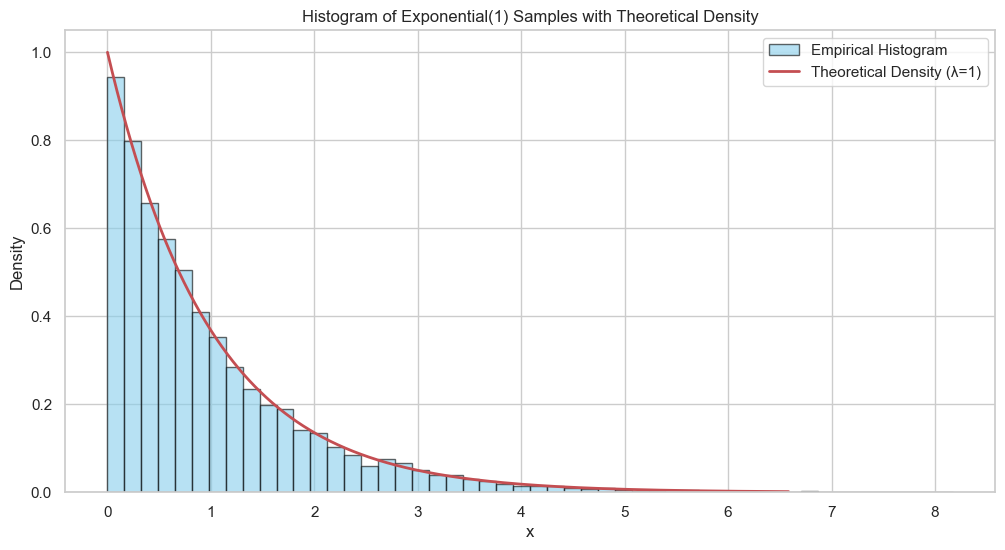

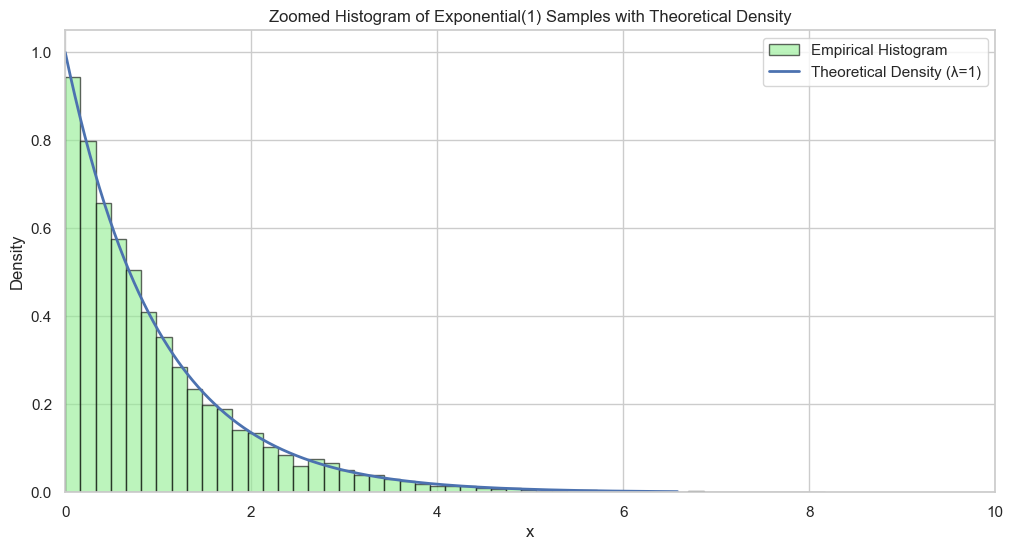

In [13]:
# Section 2: Plotting Histogram with Theoretical Density

def plot_exponential_histogram(samples, lambda_param=1, bins=50, zoom=False, zoom_range=(0, 10)):
    """
    Plot histogram of Exponential samples with theoretical density.
    
    Parameters:
    - samples (np.ndarray): Array of Exponential random variables.
    - lambda_param (float): Rate parameter λ of the Exponential distribution.
    - bins (int): Number of bins for the histogram.
    - zoom (bool): Whether to include a zoomed-in plot.
    - zoom_range (tuple): Range (a, b) for zoomed-in plot.
    """
    plt.figure(figsize=(12, 6))
    
    # Define the range for x based on samples
    x_min = 0
    x_max = np.percentile(samples, 99.9)  # To cover most data points
    x_vals = np.linspace(x_min, x_max, 1000)
    
    # Theoretical Exponential density
    theoretical_density = lambda_param * np.exp(-lambda_param * x_vals)
    
    # Plot histogram
    plt.hist(samples, bins=bins, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Empirical Histogram')
    
    # Plot theoretical density
    plt.plot(x_vals, theoretical_density, 'r-', lw=2, label='Theoretical Density (λ=1)')
    
    # Add labels and title
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.title('Histogram of Exponential(1) Samples with Theoretical Density')
    plt.legend()
    plt.show()
    
    # If zoomed plot is requested
    if zoom:
        plt.figure(figsize=(12, 6))
        plt.hist(samples, bins=bins, density=True, alpha=0.6, color='lightgreen', edgecolor='black', label='Empirical Histogram')
        plt.plot(x_vals, theoretical_density, 'b-', lw=2, label='Theoretical Density (λ=1)')
        plt.xlim(zoom_range)
        plt.xlabel('x')
        plt.ylabel('Density')
        plt.title('Zoomed Histogram of Exponential(1) Samples with Theoretical Density')
        plt.legend()
        plt.show()

# Plot the histogram with theoretical density
plot_exponential_histogram(exp_samples, lambda_param=lambda_param, bins=50, zoom=True, zoom_range=(0, 10))


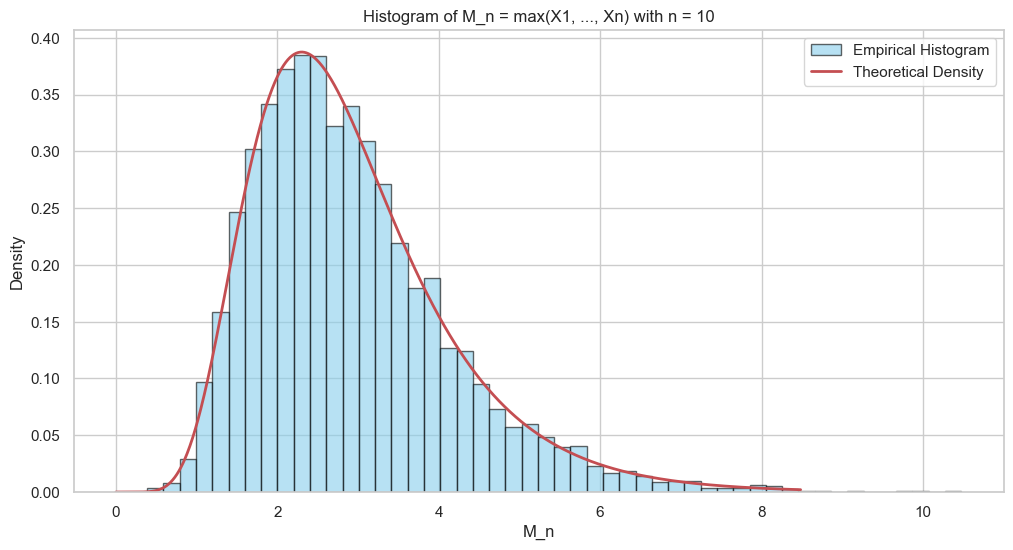

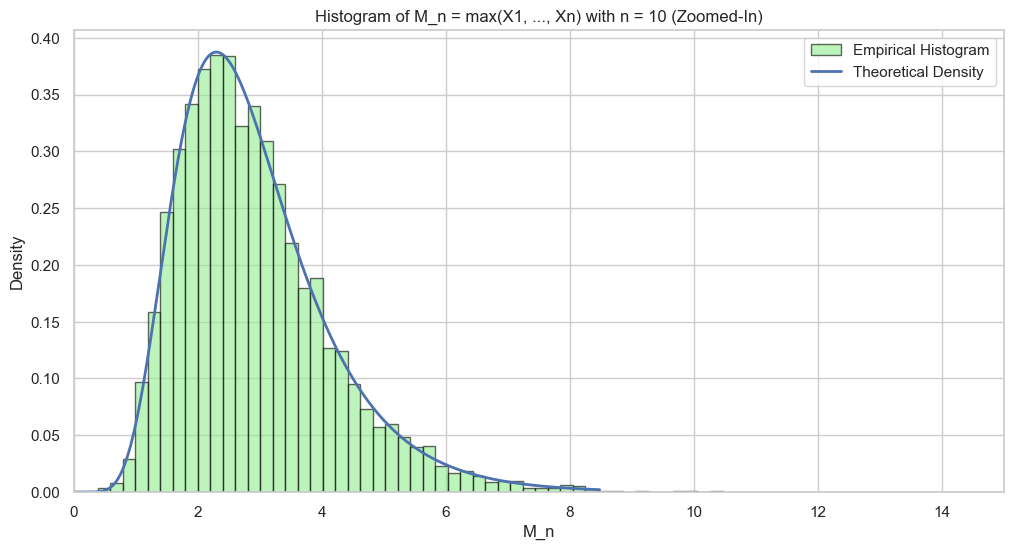

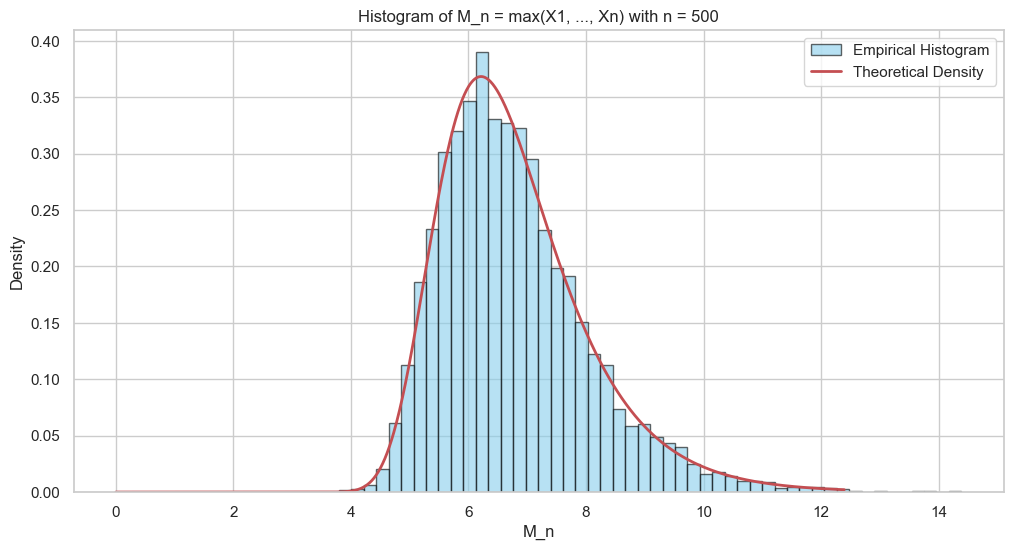

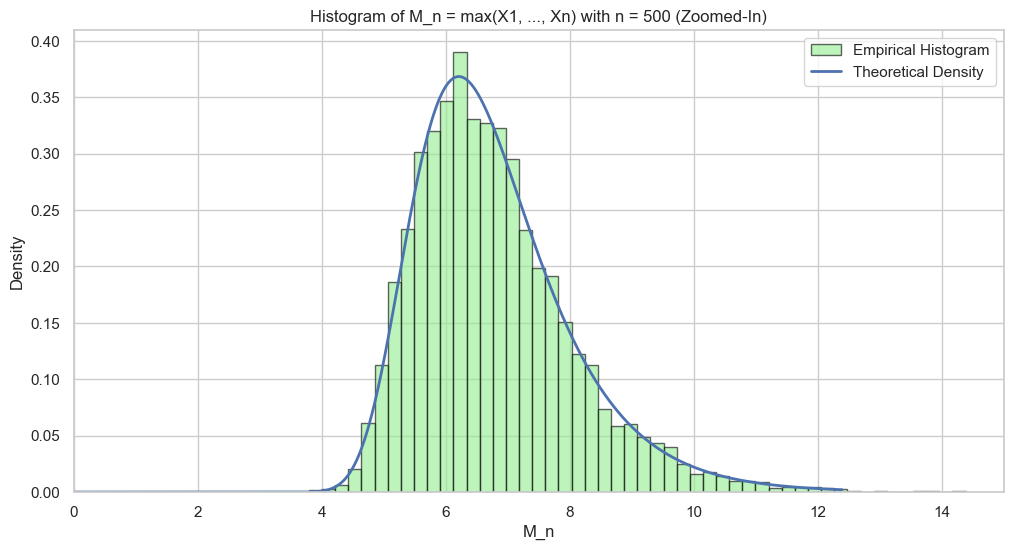

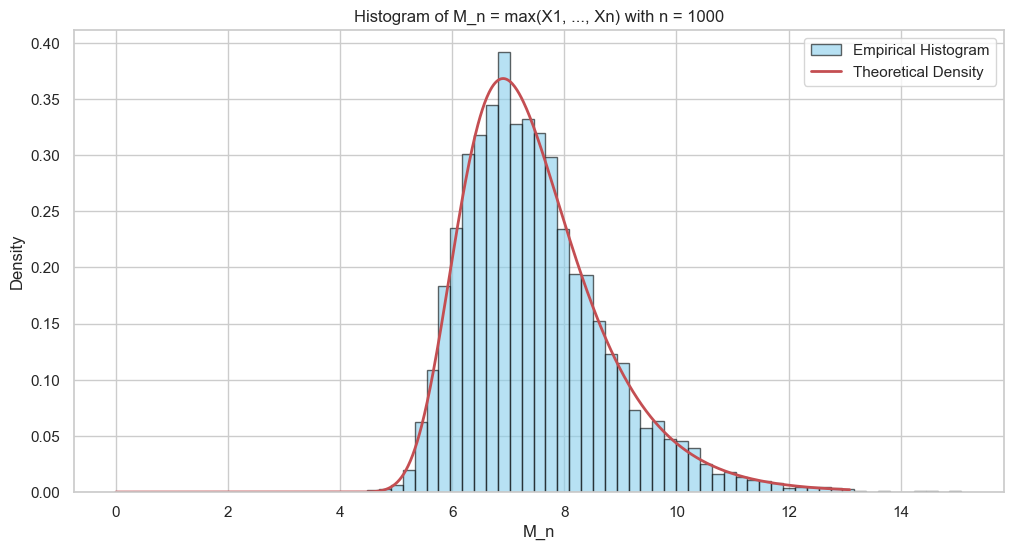

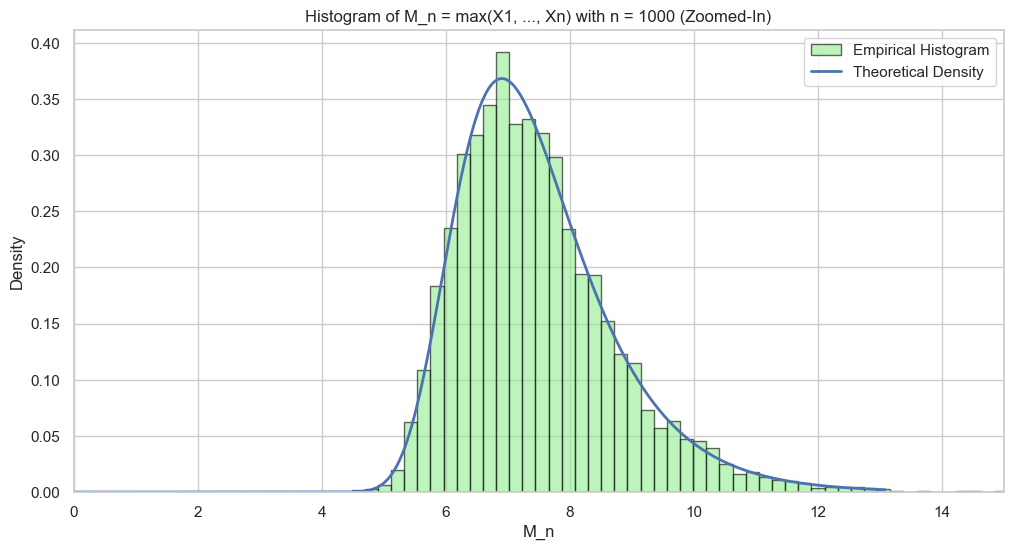

In [14]:
# Section 3: Analyzing the Distribution of Maximums M_n

def simulate_Mn(n, num_simulations=5000, random_seed=None):
    """
    Simulate M_n = max(X1, X2, ..., Xn) where Xi ~ Exponential(1).
    
    Parameters:
    - n (int): Number of samples per simulation.
    - num_simulations (int): Number of M_n samples to generate.
    - random_seed (int, optional): Seed for reproducibility.
    
    Returns:
    - np.ndarray: Array of M_n samples.
    """
    if random_seed is not None:
        np.random.seed(random_seed)
    
    # Let's use inverse transform sampling for M_n.
    # The CDF of M_n is [1 - e^{-x}]^n.
    # To sample M_n, use inverse transform: M_n = -ln(1 - U^{1/n}) where U ~ Uniform(0,1)
    
    U = np.random.uniform(0, 1, num_simulations)
    Mn_samples = -np.log(1 - U**(1/n))
    return Mn_samples

def theoretical_density_Mn(x, n, lambda_param=1):
    """
    Compute the theoretical density of M_n for Exponential(1) variables.
    
    Parameters:
    - x (float or np.ndarray): Value(s) at which to compute the density.
    - n (int): Number of variables in the maximum.
    - lambda_param (float): Rate parameter λ of the Exponential distribution.
    
    Returns:
    - float or np.ndarray: Theoretical density f_{M_n}(x).
    """
    F = 1 - np.exp(-lambda_param * x)
    f = n * (F)**(n-1) * lambda_param * np.exp(-lambda_param * x)
    return f

def plot_Mn_histogram(Mn_samples, n, lambda_param=1, bins=50, zoom=False, zoom_range=(0, 10)):
    """
    Plot histogram of M_n samples with theoretical density.
    
    Parameters:
    - Mn_samples (np.ndarray): Array of M_n samples.
    - n (int): Number of variables in the maximum.
    - lambda_param (float): Rate parameter λ of the Exponential distribution.
    - bins (int): Number of histogram bins.
    - zoom (bool): Whether to include a zoomed-in plot.
    - zoom_range (tuple): Range (a, b) for zoomed-in plot.
    """
    plt.figure(figsize=(12, 6))
    
    # Define the range for x based on samples
    x_min = 0
    x_max = np.percentile(Mn_samples, 99.9)  # To cover most data points
    x_vals = np.linspace(x_min, x_max, 1000)
    
    # Compute theoretical density
    theoretical_density = theoretical_density_Mn(x_vals, n, lambda_param)
    
    # Plot histogram
    plt.hist(Mn_samples, bins=bins, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Empirical Histogram')
    
    # Plot theoretical density
    plt.plot(x_vals, theoretical_density, 'r-', lw=2, label='Theoretical Density')
    
    # Add labels and title
    plt.xlabel('M_n')
    plt.ylabel('Density')
    plt.title(f'Histogram of M_n = max(X1, ..., Xn) with n = {n}')
    plt.legend()
    plt.show()
    
    # If zoomed plot is requested
    if zoom:
        plt.figure(figsize=(12, 6))
        plt.hist(Mn_samples, bins=bins, density=True, alpha=0.6, color='lightgreen', edgecolor='black', label='Empirical Histogram')
        plt.plot(x_vals, theoretical_density, 'b-', lw=2, label='Theoretical Density')
        plt.xlim(zoom_range)
        plt.xlabel('M_n')
        plt.ylabel('Density')
        plt.title(f'Histogram of M_n = max(X1, ..., Xn) with n = {n} (Zoomed-In)')
        plt.legend()
        plt.show()

# Define the values of n to analyze
n_values = [10, 500, 1000]

# For each n, simulate M_n and plot histogram with theoretical density
for n in n_values:
    Mn_samples = simulate_Mn(n, num_simulations=5000, random_seed=42)
    plot_Mn_histogram(Mn_samples, n, lambda_param=lambda_param, bins=50, zoom=True, zoom_range=(0, 15))


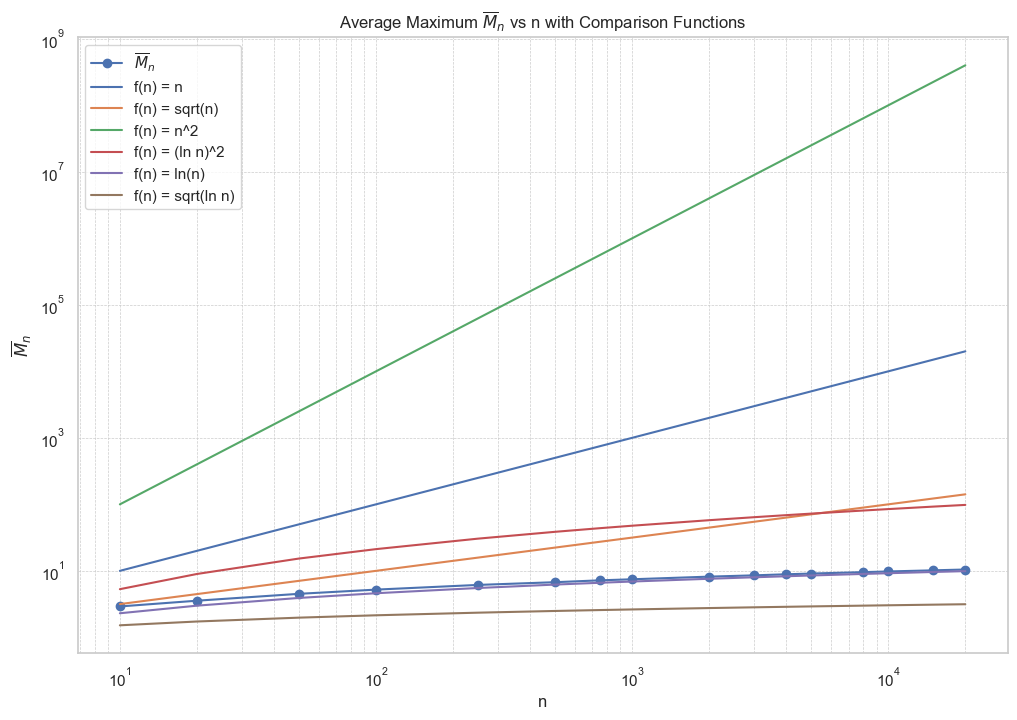

In [16]:
# Section 4: Investigating the Growth of \overline{M}_n

def compute_average_Mn(n_values, num_simulations=5000, lambda_param=1, random_seed=None):
    """
    Compute the average \overline{M}_n for each n in n_values.
    
    Parameters:
    - n_values (list or array): List of n values.
    - num_simulations (int): Number of M_n samples per n.
    - lambda_param (float): Rate parameter λ of the Exponential distribution.
    - random_seed (int, optional): Seed for reproducibility.
    
    Returns:
    - dict: Dictionary mapping n to \overline{M}_n.
    """
    if random_seed is not None:
        np.random.seed(random_seed)
    
    average_Mn_dict = {}
    for n in n_values:
        Mn_samples = simulate_Mn(n, num_simulations=num_simulations)
        average_Mn = np.mean(Mn_samples)
        average_Mn_dict[n] = average_Mn
    return average_Mn_dict

def plot_average_Mn(n_values, average_Mn_dict, comparison_functions):
    """
    Plot \overline{M}_n vs n and overlay comparison functions.
    
    Parameters:
    - n_values (list or array): List of n values.
    - average_Mn_dict (dict): Dictionary mapping n to \overline{M}_n.
    - comparison_functions (dict): Dictionary mapping function names to function handles.
    """
    plt.figure(figsize=(12, 8))
    
    # Plot \overline{M}_n vs n
    plt.plot(n_values, [average_Mn_dict[n] for n in n_values], 'bo-', label=r'$\overline{M}_n$')
    
    # Plot comparison functions
    for name, func in comparison_functions.items():
        plt.plot(n_values, func(n_values), label=name)
    
    # Add labels and title
    plt.xlabel('n')
    plt.ylabel(r'$\overline{M}_n$')
    plt.title(r'Average Maximum $\overline{M}_n$ vs n with Comparison Functions')
    plt.legend()
    plt.xscale('log')  # Log scale for better visualization over large n
    plt.yscale('log')  # Log scale if functions span multiple orders
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.show()

# Define the n values
n_values_growth = [10, 20, 50, 100, 250, 500, 750, 1000, 2000, 3000, 4000, 5000, 8000, 10000, 15000, 20000]

# Compute \overline{M}_n for each n
average_Mn = compute_average_Mn(n_values_growth, num_simulations=5000, lambda_param=lambda_param, random_seed=42)

# Define comparison functions
comparison_functions = {
    'f(n) = n': lambda n: np.array(n),
    'f(n) = sqrt(n)': lambda n: np.sqrt(np.array(n)),
    'f(n) = n^2': lambda n: np.array(n)**2,
    'f(n) = (ln n)^2': lambda n: (np.log(np.array(n)))**2,
    'f(n) = ln(n)': lambda n: np.log(np.array(n)),
    'f(n) = sqrt(ln n)': lambda n: np.sqrt(np.log(np.array(n)))
}

# Plot \overline{M}_n vs n with comparison functions
plot_average_Mn(n_values_growth, average_Mn, comparison_functions)


# Notes

It seems like the ln (n) seems to be the best!

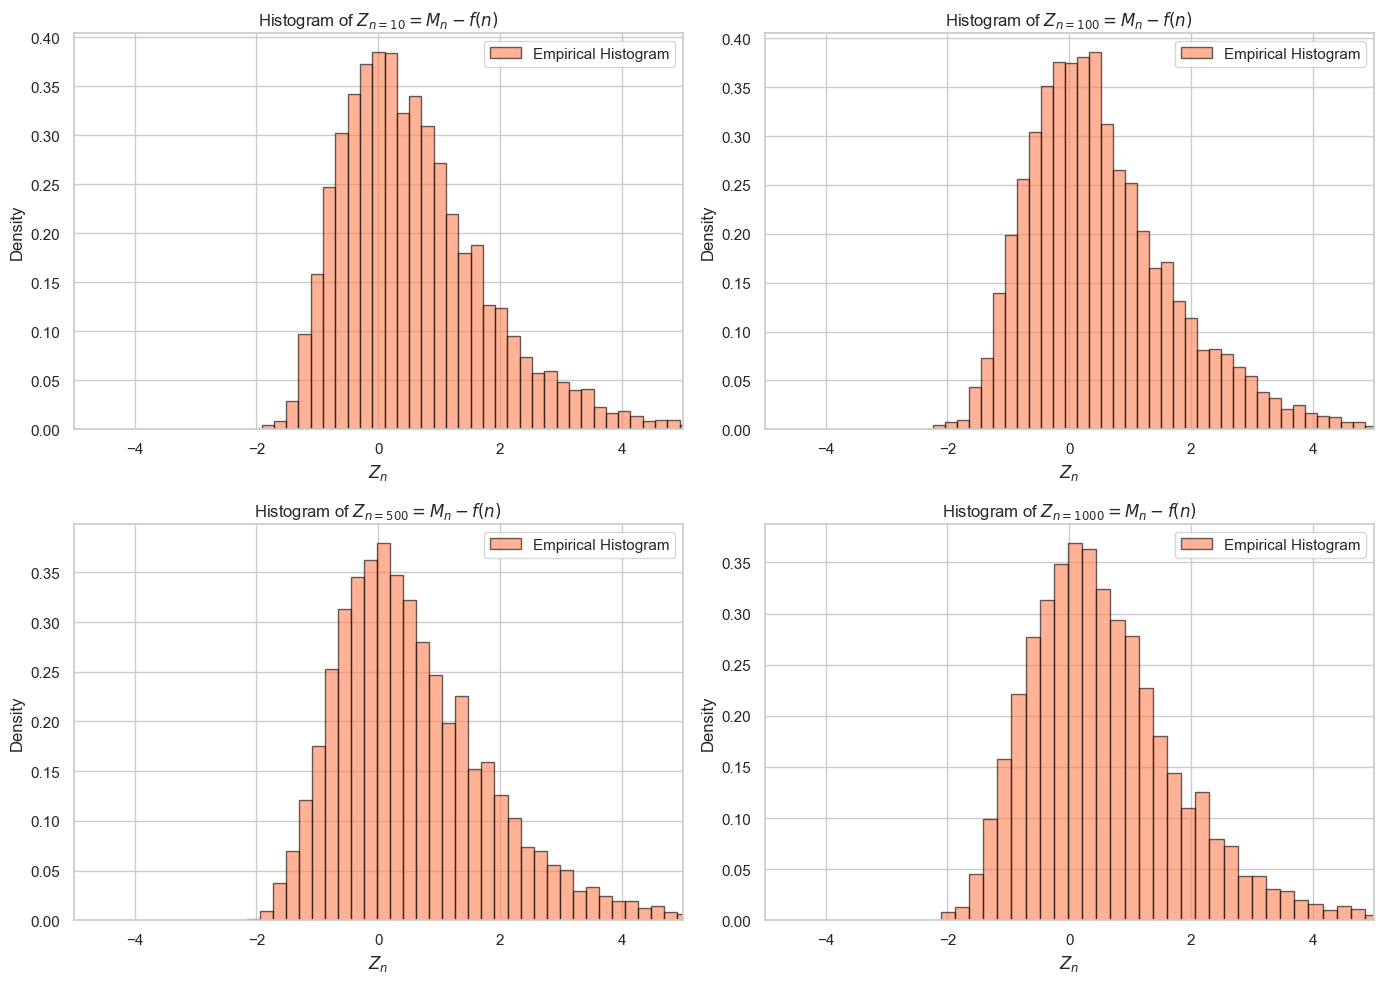

In [17]:
# Section 5: Examining the Distribution of Z_n = M_n - f(n)

def compute_Zn_samples(n_values, f_n_func, num_simulations=5000, lambda_param=1, random_seed=None):
    """
    Compute Z_n = M_n - f(n) for each n in n_values.
    
    Parameters:
    - n_values (list or array): List of n values.
    - f_n_func (function): Function to compute f(n).
    - num_simulations (int): Number of M_n samples per n.
    - lambda_param (float): Rate parameter λ of the Exponential distribution.
    - random_seed (int, optional): Seed for reproducibility.
    
    Returns:
    - dict: Dictionary mapping n to array of Z_n samples.
    """
    if random_seed is not None:
        np.random.seed(random_seed)
    
    Zn_dict = {}
    for n in n_values:
        Mn_samples = simulate_Mn(n, num_simulations=num_simulations)
        f_n = f_n_func(n)
        Zn = Mn_samples - f_n
        Zn_dict[n] = Zn
    return Zn_dict

def plot_Zn_histograms(Zn_dict, n_values, bins=50, zoom=False, zoom_range=(-5, 5)):
    """
    Plot histograms of Z_n for each n.
    
    Parameters:
    - Zn_dict (dict): Dictionary mapping n to array of Z_n samples.
    - n_values (list or array): List of n values.
    - bins (int): Number of histogram bins.
    - zoom (bool): Whether to include a zoomed-in plot.
    - zoom_range (tuple): Range (a, b) for zoomed-in plot.
    """
    num_plots = len(n_values)
    cols = 2
    rows = (num_plots + 1) // cols
    plt.figure(figsize=(14, 5 * rows))
    
    for idx, n in enumerate(n_values, 1):
        Zn_samples = Zn_dict[n]
        plt.subplot(rows, cols, idx)
        plt.hist(Zn_samples, bins=bins, density=True, alpha=0.6, color='coral', edgecolor='black')
        plt.title(rf'Histogram of $Z_{{n={n}}} = M_n - f(n)$')
        plt.xlabel(r'$Z_n$')
        plt.ylabel('Density')
        if zoom:
            plt.xlim(zoom_range)
        plt.legend([r'Empirical Histogram'], loc='upper right')
    
    plt.tight_layout()
    plt.show()

# Define the n values for Z_n analysis
n_values_Zn = [10, 100, 500, 1000]

# Define f(n) = ln(n), identified as the best fit in Section 4
f_n_best_fit = lambda n: np.log(n)

# Compute Z_n samples
Zn_samples_dict = compute_Zn_samples(n_values_Zn, f_n_best_fit, num_simulations=5000, lambda_param=lambda_param, random_seed=42)

# Plot histograms of Z_n
plot_Zn_histograms(Zn_samples_dict, n_values_Zn, bins=50, zoom=True, zoom_range=(-5, 5))


This definetely looks more possion than normal I think 

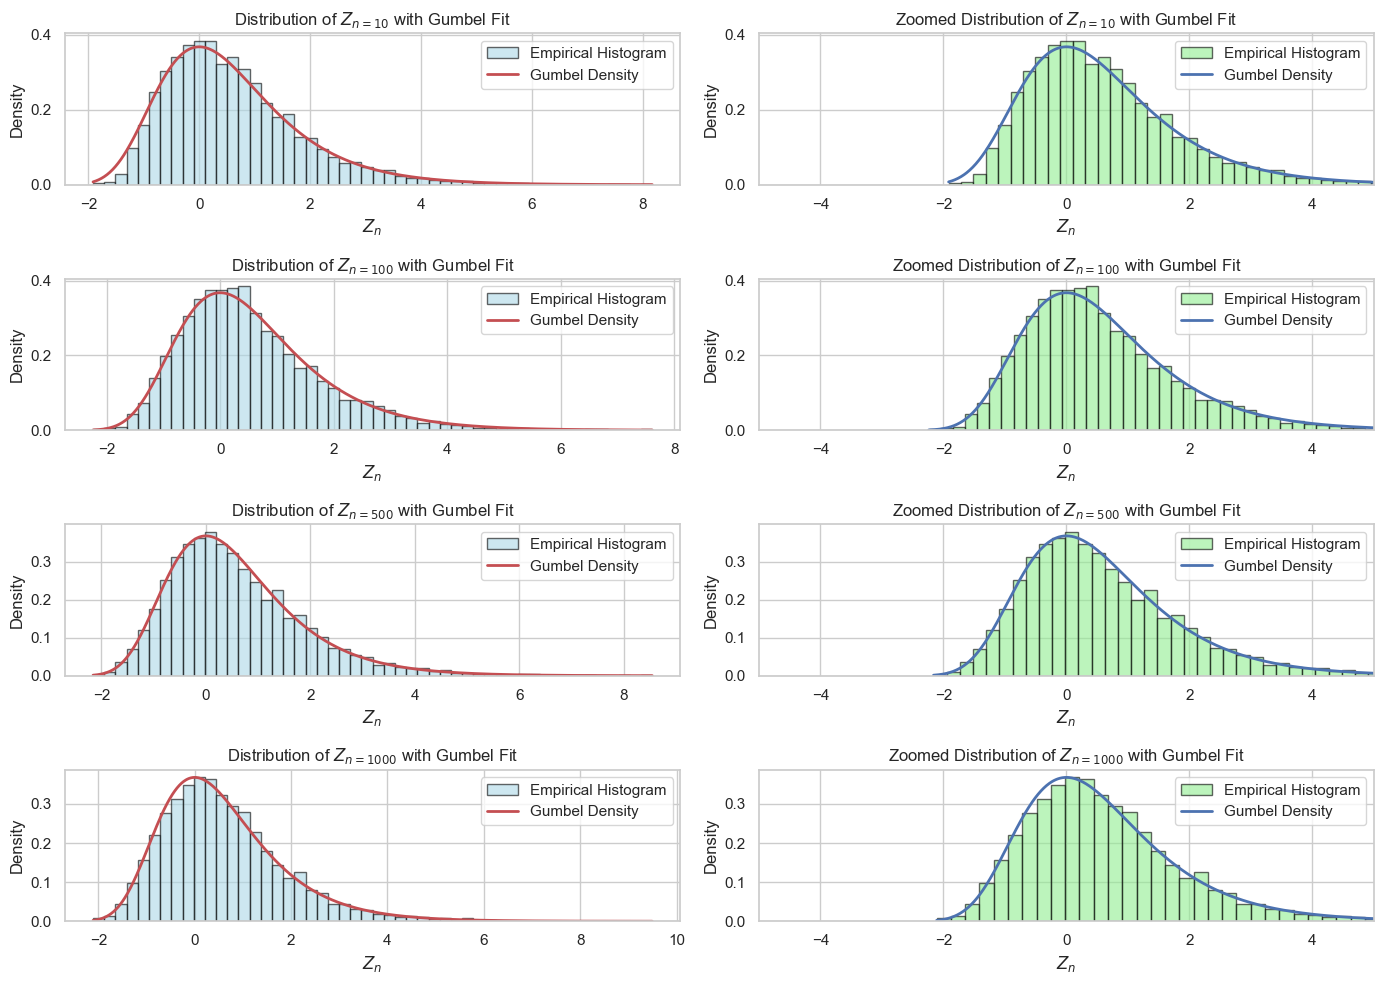

In [18]:
# Section 6: Identifying the Best-Fit Density Function for Z_n

def gumbel_density(x):
    """
    Compute the Gumbel (Extreme Value Type I) density function.
    
    Parameters:
    - x (float or np.ndarray): Value(s) at which to compute the density.
    
    Returns:
    - float or np.ndarray: Gumbel density values at x.
    """
    return np.exp(-(x + np.exp(-x)))

def plot_best_fit_density(Zn_samples_dict, n_values, density_func, bins=50, zoom=True, zoom_range=(-5, 5)):
    """
    Plot histograms of Z_n with the best-fit density function overlaid.
    
    Parameters:
    - Zn_samples_dict (dict): Dictionary mapping n to Z_n samples.
    - n_values (list or array): List of n values.
    - density_func (function): Function to compute the density at given x.
    - bins (int): Number of histogram bins.
    - zoom (bool): Whether to include a zoomed-in plot.
    - zoom_range (tuple): Range (a, b) for zoomed-in plot.
    """
    plt.figure(figsize=(14, 10))
    
    for idx, n in enumerate(n_values, 1):
        Zn_samples = Zn_samples_dict[n]
        plt.subplot(len(n_values), 2, 2*idx-1)
        plt.hist(Zn_samples, bins=bins, density=True, alpha=0.6, color='lightblue', edgecolor='black', label='Empirical Histogram')
        
        # Define range for x based on histogram
        x_min = Zn_samples.min()
        x_max = Zn_samples.max()
        x_vals = np.linspace(x_min, x_max, 1000)
        
        # Compute theoretical density
        theoretical_density = density_func(x_vals)
        
        # Plot theoretical density
        plt.plot(x_vals, theoretical_density, 'r-', lw=2, label='Gumbel Density')
        
        plt.xlabel(r'$Z_n$')
        plt.ylabel('Density')
        plt.title(rf'Distribution of $Z_{{n={n}}}$ with Gumbel Fit')
        plt.legend()
        
        if zoom:
            plt.subplot(len(n_values), 2, 2*idx)
            plt.hist(Zn_samples, bins=bins, density=True, alpha=0.6, color='lightgreen', edgecolor='black', label='Empirical Histogram')
            plt.plot(x_vals, theoretical_density, 'b-', lw=2, label='Gumbel Density')
            plt.xlim(zoom_range)
            plt.xlabel(r'$Z_n$')
            plt.ylabel('Density')
            plt.title(rf'Zoomed Distribution of $Z_{{n={n}}}$ with Gumbel Fit')
            plt.legend()
    
    plt.tight_layout()
    plt.show()

# Define the Gumbel density function as the best fit
best_fit_density = gumbel_density

# Plot the best-fit density against Z_n histograms
plot_best_fit_density(Zn_samples_dict, n_values_Zn, best_fit_density, bins=50, zoom=True, zoom_range=(-5, 5))
